<a href="https://colab.research.google.com/github/poojaram14/Toxic_comment_classification/blob/main/CNN_for_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toxic Comments Classification Using CNN

In [1]:
import re
import numpy as np
import pandas as pd
import sklearn
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [2]:
# Reading the train data. 
train = pd.read_csv("train.csv")
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
# Summary of train data.
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Reading the test data.
test = pd.read_csv("test.csv")
test.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
# Summary of test data.
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


In [6]:
test.shape

(153164, 2)

In [7]:
# Load data, , testing labels
test_labels = pd.read_csv("test_labels.csv")
test_labels.head(5)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [8]:
test_labels.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000
mean,-0.542530,-0.579895,-0.558193,-0.580913,-0.559916,-0.577642
std,0.572465,0.498408,0.542966,0.496195,0.539594,0.503260
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Dropping samples with "-1" value of -1 indicates it was not used for scoring

test_labels = test_labels[test_labels['toxic'] != -1]

test_labels.head(2)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0


In [10]:
# Dropping the same samples from test data.

test = test[test['id'].isin(test_labels['id'])]

test.head(2)

,id,comment_text
5,0001ea8717f6de06,Thank you for understanding. I think very high...
7,000247e83dcc1211,:Dear god this site is horrible.


In [11]:
print("Overall shape of test and labels set:", test.shape, test_labels.shape)

Overall shape of test and labels set: (63978, 2) (63978, 7)


In [12]:
# Dropping id column, since we have our final dataset to work on:
train  = train.drop(['id'],axis = 1) # axis = 1 for column
test   = test.drop(['id'],axis = 1)
test_labels = test_labels.drop(['id'],axis = 1)

In [13]:
# Checking for missing data in the dataset:
print("Training set:\n", train.isnull().sum(),"\n")
print("Testing set:\n", test.isna().sum(),"\n")
print("Test label set:\n", test_labels.isna().sum(),"\n")

Training set:
 comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64 

Testing set:
 comment_text    0
dtype: int64 

Test label set:
 toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64 



- No null values found

In [14]:
# TASK CELL

def clean_message(message):
    '''
    Input:
        message: a string containing a message.
    Output:
        messages_cleaned: a list of words containing the processed message. 
    '''
    
    # Remove punctuations:
    message = message.replace("-", " ")
    message = message.replace("\t", " ")
    message = message.replace("\n", " ")
    message = re.sub(r'[^\w\s]', '', message)
    
    # Remove links:
    message = re.sub(r"http\S+", "", message)
    
    # Normalize the words w.r.t. character case:
    
    message = message.lower()
       
    # Delete extra spaces:
    cleaned_message = re.sub(' +',' ',message) 
    
    return cleaned_message

In [15]:
# Stripping out leading and trailing white spaces:

train['comment_text'] = train['comment_text'].map(lambda x : x.strip())
test['comment_text'] = test['comment_text'].map(lambda x : x.strip())

In [16]:
# Cleaning entire comment column:
train['comment_text'] = train['comment_text'].map(lambda x : clean_message(x))
test['comment_text'] = test['comment_text'].map(lambda x : clean_message(x))

In [17]:
# Check a few comments
print(train["comment_text"].values[5])

 congratulations from me as well use the tools well   talk 


In [18]:
# Data for train:

X_train = train["comment_text"].values

In [19]:
# Adding a column to the data comments are non-toxic:
train['non_toxic'] = train['toxic'] + train['severe_toxic'] + train['obscene'] + train['threat'] + train['insult'] + train['identity_hate']    
train.loc[train['non_toxic'] == 0, 'non_toxic'] = -1
train.loc[train['non_toxic'] > 0, 'non_toxic'] = 0
train.loc[train['non_toxic'] == -1, 'non_toxic'] = 1
train.head(3)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
0,explanation why the edits made under my userna...,0,0,0,0,0,0,1
1,daww he matches this background colour im seem...,0,0,0,0,0,0,1
2,hey man im really not trying to edit war its j...,0,0,0,0,0,0,1


In [20]:
# Adding a column to the data comments are non-toxic:
test_labels['non_toxic'] = test_labels['toxic'] + test_labels['severe_toxic'] + test_labels['obscene'] + test_labels['threat'] + test_labels['insult'] + test_labels['identity_hate']    
test_labels.loc[test_labels['non_toxic'] == 0, 'non_toxic'] = -1
test_labels.loc[test_labels['non_toxic'] > 0, 'non_toxic'] = 0
test_labels.loc[test_labels['non_toxic'] == -1, 'non_toxic'] = 1
test_labels.head(3)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
5,0,0,0,0,0,0,1
7,0,0,0,0,0,0,1
11,0,0,0,0,0,0,1


In [21]:
list_class = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate", "non_toxic"]
y_train = train[list_class].values
print(y_train)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [22]:
X_test = test['comment_text'].values
print(X_test[5])

this other one from 1897


In [23]:
y_test = test_labels.values
print(y_test)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [1 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 1]]


In [24]:
# Checking final data and label shapes for training and testing:

print("Training data shape: ",X_train.shape)
print("Training labels shape after adding the non_toxic column: ",y_train.shape)
print("Testing data shape: ",X_test.shape)
print("Testing labels shape after adding the non_toxic column: ",y_test.shape)

Training data shape:  (159571,)
Training labels shape after adding the non_toxic column:  (159571, 7)
Testing data shape:  (63978,)
Testing labels shape after adding the non_toxic column:  (63978, 7)


(144277, 157976, 151122, 159093, 151694, 158166, 143346)
(15294, 1595, 8449, 478, 7877, 1405, 16225)


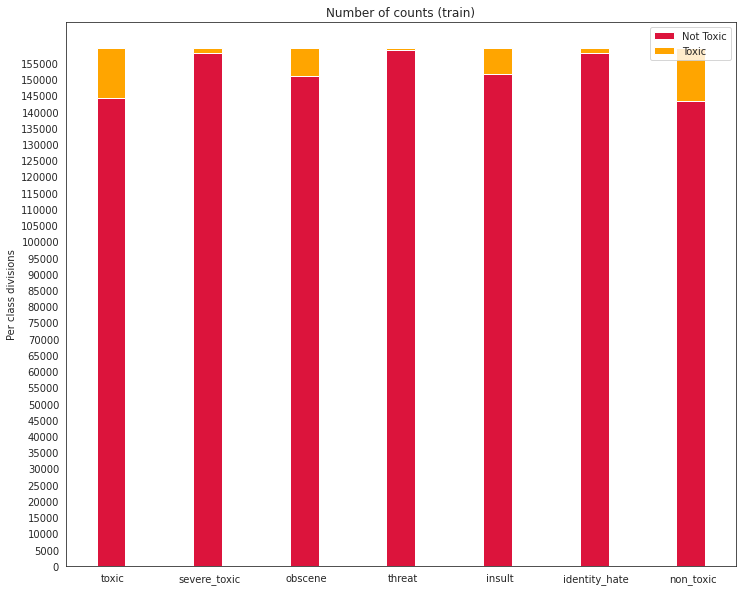

In [25]:
# Plotting histogram - training class distribution

labels = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic')
sns.set_style("white")
sns.set_context({"figure.figsize": (12, 10)})

N = 7
class_0 = (train.value_counts('toxic')[0], train.value_counts('severe_toxic')[0], train.value_counts('obscene')[0], train.value_counts('threat')[0], train.value_counts('insult')[0], train.value_counts('identity_hate')[0], train.value_counts('non_toxic')[1])
print(class_0)
class_1 = (train.value_counts('toxic')[1], train.value_counts('severe_toxic')[1], train.value_counts('obscene')[1], train.value_counts('threat')[1], train.value_counts('insult')[1], train.value_counts('identity_hate')[1], train.value_counts('non_toxic')[0])
print(class_1)

ind = np.arange(N)    # the x locations for the groups
width = 0.3       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, class_0, width, color='crimson')
p2 = plt.bar(ind, class_1, width, color='orange', bottom=class_0)

plt.ylabel('Per class divisions')
plt.title('Number of counts (train)')
plt.xticks(ind+width/14, labels)
plt.yticks(np.arange(0,160000,5000))
plt.legend((p1[0], p2[0]), ('Not Toxic', 'Toxic'))

plt.show()

(57888, 63611, 60287, 63767, 60551, 63266, 57735)
(6090, 367, 3691, 211, 3427, 712, 6243)


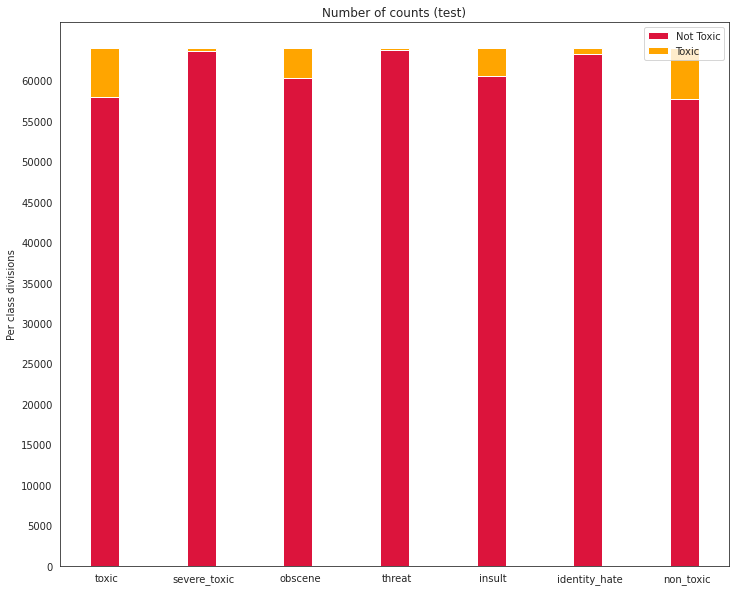

In [26]:
# Plotting histogram - testing class distribution

labels = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic')
sns.set_style("white")
sns.set_context({"figure.figsize": (12, 10)})

N = 7
class_0 = (test_labels.value_counts('toxic')[0], test_labels.value_counts('severe_toxic')[0], test_labels.value_counts('obscene')[0], test_labels.value_counts('threat')[0], test_labels.value_counts('insult')[0], test_labels.value_counts('identity_hate')[0], test_labels.value_counts('non_toxic')[1])
print(class_0)
class_1 = (test_labels.value_counts('toxic')[1], test_labels.value_counts('severe_toxic')[1], test_labels.value_counts('obscene')[1], test_labels.value_counts('threat')[1], test_labels.value_counts('insult')[1], test_labels.value_counts('identity_hate')[1], test_labels.value_counts('non_toxic')[0])
print(class_1)

ind = np.arange(N)    # the x locations for the groups
width = 0.3       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, class_0, width, color='crimson')
p2 = plt.bar(ind, class_1, width, color='orange', bottom=class_0)

plt.ylabel('Per class divisions')
plt.title('Number of counts (test)')
plt.xticks(ind+width/14, labels)
plt.yticks(np.arange(0,65000,5000))
plt.legend((p1[0], p2[0]), ('Not Toxic', 'Toxic'))

plt.show()

In [27]:
# We observe significant number of non-toxic samples, creating a massive majority over the toxic samples(highly imbalanced). Could lead tooverfitting. 

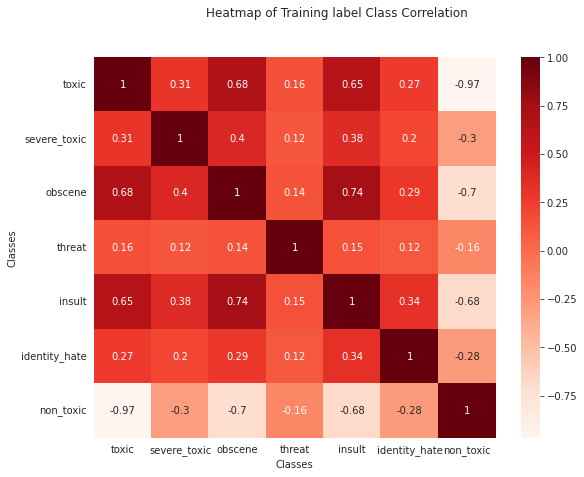

In [28]:
# heatmap for training data
fig = plt.figure(figsize = (9,7))
sns.heatmap(train.corr(), annot=True, cmap="Reds")
plt.suptitle('Heatmap of Training label Class Correlation',size = 12)
plt.xlabel("Classes")
plt.ylabel("Classes")
plt.show()

In [29]:
# Number of non_toxic samples:
type_rows = train['non_toxic'].value_counts()
non_toxic_rows = type_rows[1]
toxic_rows = type_rows[0]
non_toxic_rows

143346

In [30]:
# Imbalance ratio
toxic_ratio = non_toxic_rows / len(train['non_toxic'])
toxic_ratio

0.8983211235124177

In [31]:
# Taking out 1.75 times of the data to bring the data to 1:3 ratio.
count_to_be_kept = 3*toxic_rows
count_to_be_kept

48675

In [32]:
y_train[:, :6]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [33]:
# Selecting rows from a numpydarray: 

non_toxic_rows = np.where(~y_train[:, :6].any(axis=1))[0]
non_toxic_rows

array([     0,      1,      2, ..., 159568, 159569, 159570])

In [34]:
# Get index  where rows of training labels are zeros for the first 90000 rows, to be dropped. 
drop_rows_indx = non_toxic_rows[0:90000] 

In [35]:
drop_rows_indx.shape

(90000,)

In [36]:
# Dropping the rows from training data
for indx in drop_rows_indx:
    if indx%10000 == 0:
        print(indx)
    train = train.drop([indx], axis=0)

0
10000
20000
30000
40000
60000
70000
80000
90000
100000


In [37]:
train.shape

(69571, 8)

In [38]:
train.head(10)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
6,cocksucker before you piss around on my work,1,1,1,0,1,0,0
12,hey what is it talk what is it an exclusive gr...,1,0,0,0,0,0,0
16,bye dont look come or think of comming back to...,1,0,0,0,0,0,0
42,you are gay or antisemmitian archangel white t...,1,0,1,0,1,1,0
43,fuck your filthy mother in the ass dry,1,0,1,0,1,0,0
44,im sorry im sorry i screwed around with someon...,1,0,0,0,0,0,0
51,get fucked up get fuckeeed up got a drink that...,1,0,1,0,0,0,0
55,stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0,0
56,tony sidaway is obviously a fistfuckee he love...,1,0,1,0,1,0,0
58,my band pages deletion you thought i was gone ...,1,0,1,0,0,0,0


In [39]:
for label in labels:
    print("total class of 1 and 0:", train[label].value_counts())

total class of 1 and 0: 0    54277
1    15294
Name: toxic, dtype: int64
total class of 1 and 0: 0    67976
1     1595
Name: severe_toxic, dtype: int64
total class of 1 and 0: 0    61122
1     8449
Name: obscene, dtype: int64
total class of 1 and 0: 0    69093
1      478
Name: threat, dtype: int64
total class of 1 and 0: 0    61694
1     7877
Name: insult, dtype: int64
total class of 1 and 0: 0    68166
1     1405
Name: identity_hate, dtype: int64
total class of 1 and 0: 1    53346
0    16225
Name: non_toxic, dtype: int64


- The distribution of labels is slightly more balanced than before

In [40]:
# Updating X_train
X_train = train["comment_text"].values
print(X_train[:5])

['cocksucker before you piss around on my work'
 'hey what is it talk what is it an exclusive group of some wp talibanswho are good at destroying self appointed purist who gang up any one who asks them questions abt their anti social and destructive non contribution at wp ask sityush to clean up his behavior than issue me nonsensical warnings'
 'bye dont look come or think of comming back tosser'
 'you are gay or antisemmitian archangel white tiger meow greetingshhh uh there are two ways why you do erased my comment about ww2 that holocaust was brutally slaying of jews and not gaysgypsysslavsanyone 1 if you are anti semitian than shave your head bald and go to the skinhead meetings 2 if you doubt words of the bible that homosexuality is a deadly sin make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals 3 first and last warning you fucking gay i wont appreciate if any more nazi shwain would write in my page i dont wish to talk to you anymore beware of th

In [41]:
# store training labels in y
labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate", "non_toxic"]
y_train = train[labels].values
print(y_train)

[[1 1 1 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [42]:
print(X_train.shape, y_train.shape)

(69571,) (69571, 7)


In [43]:
# Maximum feature vectors to be consdered
max_words = 20000 

# Maximum length of comments to be considered (Padding each comment to the same length)
max_length = 500

In [44]:
# Tokenization: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences

tokenizer = text.Tokenizer(max_words)

tokenizer.fit_on_texts(list(X_train))

X_train_token = tokenizer.texts_to_sequences(X_train)

X_train_final = sequence.pad_sequences(X_train_token, maxlen = max_length) # Padding to a length of 500

In [45]:
# Tokenizing test the same way as train

X_test_tokenized = tokenizer.texts_to_sequences(X_test)

X_test_final = sequence.pad_sequences(X_test_tokenized,maxlen = max_length) 

In [46]:
# Initializing glove data
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-04-25 01:15:42--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-04-25 01:15:42--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-04-25 01:15:42--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [47]:
# Referring to: https://analyticsindiamag.com/hands-on-guide-to-word-embeddings-using-glove/

# Dictionary holding words and their corresponding vectors:
embed_dict = {}

f = open('glove.6B.100d.txt')

for line in f:
    values = line.split()
    
    word = values[0]

    vector = np.asarray(values[1:],dtype = 'float32')
    
    # Populating embed dictionary:
    embed_dict[word]=vector 
    
f.close()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


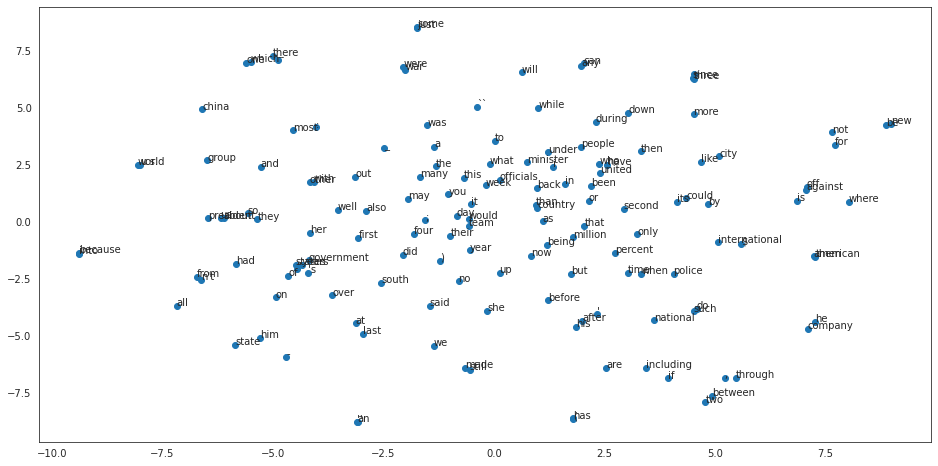

In [48]:
# Distributed Stochastic Gradient Neighbor Embeddings for visualizing the embedded vectors:

# Trying to break it down into 2 components: (inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree)

distri = TSNE(n_components = 2)
words = list(embed_dict.keys())
vectors = [embed_dict[word] for word in words]
y = distri.fit_transform(vectors[700:850])
plt.figure(figsize=(16,8))
plt.scatter(y[:, 0],y[:,1])
for label,x,y in zip(words,y[:, 0],y[:,1]):
  plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points')
plt.show()

In [49]:
# Preparing the embedding_matrix:

embedding_dim = 100

# Matrix of 20000*100 dimension:
embed_matrix = np.zeros((max_words, embedding_dim))

for word, index in tokenizer.word_index.items():
    
    if index > max_words - 1: 
        break
    else:
        embedding_vector = embed_dict.get(word)
    if embedding_vector is not None:
        embed_matrix[index] = embedding_vector

In [50]:
print(embed_matrix, "\n", embed_matrix.shape)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.038194   -0.24487001  0.72812003 ... -0.1459      0.82779998
   0.27061999]
 [-0.18970001  0.050024    0.19084001 ... -0.39804     0.47646999
  -0.15983   ]
 ...
 [ 0.39196    -0.38778999  1.02789998 ...  0.66882002  0.044777
   0.22894   ]
 [ 0.49978    -0.61862999 -0.22713    ... -0.30030999 -0.37156999
  -0.63499999]
 [-0.036762   -0.72149003 -0.30434    ...  0.68239999 -0.69963002
  -0.032934  ]] 
 (20000, 100)


In [51]:
# Check shape of data
print(X_train_final.shape, y_train.shape)

(69571, 500) (69571, 7)


In [52]:
# Train Test Split using the sklearn package: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_valid, y_train, y_valid = train_test_split(X_train_final, y_train,
                                              test_size = 0.3,
                                              shuffle = True,
                                              random_state = 1)

In [53]:
print("Training: Data Shape: ", X_train.shape, "Labels shape:", y_train.shape)

# Has a max length of 500

Training: Data Shape:  (48699, 500) Labels shape: (48699, 7)


In [54]:
print("Validation: Data Shape: ", X_valid.shape, "Labels shape:", y_valid.shape)

Validation: Data Shape:  (20872, 500) Labels shape: (20872, 7)


In [78]:
def accuracy_curves(trained_model):
    
    plt.figure(figsize=(9,5))    
    
    n = len(trained_model.history['accuracy'])
    
    plt.plot(np.arange(0,n) + 1, trained_model.history['accuracy'], color='green',marker="^")
    print("Training Accuracy:", trained_model.history['accuracy'][n-1])
    plt.plot(np.arange(0,n)+ 1, trained_model.history['val_accuracy'],color = 'blue', marker = "^")  
    print("Validation Accuracy:", trained_model.history['val_accuracy'][n-1])

    plt.legend(['Train Accuracy', 'Val Accuracy'], loc = "center right")
    plt.grid(True)
    
    plt.gca().set_ylim(0,1)

    plt.xlabel("Number of Epochs")
    plt.ylabel("Value")
    plt.title("Accuracy Curve", fontname = "Times New Roman", size=14, y=0.927)
    plt.show() 

In [79]:
def loss_curves(trained_model):
    plt.figure(figsize=(9,5))    
    
    n = len(trained_model.history['loss'])

    plt.plot(np.arange(0,n) + 1, trained_model.history['loss'], color = 'purple', marker="v")
    print("Training Loss:", trained_model.history['loss'][n-1])
    plt.plot(np.arange(0,n)+ 1, trained_model.history['val_loss'], color = 'pink', marker = "v")
    print("Validation Loss:", trained_model.history['val_loss'][n-1])

    plt.legend(['Train Loss', 'Val Loss'], loc = "center right")
    plt.grid(True)
    
    plt.gca().set_ylim(0,1)

    plt.xlabel("Number of Epochs")
    plt.ylabel("Value")
    plt.title("Loss Curve", fontname = "Times New Roman", size=14, y=0.927)
    plt.show() 

In [56]:
def model_validation(model):
    
    evaluation_summary = model.evaluate(X_valid, y_valid, verbose = 1)
    
    # print(evaluation_summary)

    print('Validation loss:', evaluation_summary[0])
    print("Validation accuracy:" , evaluation_summary[1])

In [57]:
embedding_dim = 100
max_features = 20000
filters = 250
kernel_size = 3
hidden_dims = 250
batch_size = 32
n_epochs = 5
actfn = 'relu'
optimizer_ = tf.optimizers.SGD
drop_rate = 0.4
learningrate = 0.02

In [60]:
def model1():
    
    model = Sequential()
    
    # Embedding layer
    model.add(Embedding(max_features, embedding_dim, trainable = False
                       ,embeddings_initializer = tf.keras.initializers.Constant(embed_matrix)))    
    # First dropout
    model.add(Dropout(drop_rate))
    
    # First convolutional layer (250 Filters, Kernel size 3 * 3, Padding actually not required)
    model.add(Conv1D(filters, 3, padding = 'valid', activation = 'relu')) 
    
    # Max pooling layer
    model.add(MaxPooling1D())
    
    # Second convolutional layer (250 Filters, Kernel size 5 * 5, )
    model.add(Conv1D(filters, 5, padding = 'valid', activation = 'relu'))
    
    # Global max pooling layer
    model.add(GlobalMaxPooling1D())
    
    # Fully Connected Layer with 250 neurons (processing output from the 250 kernels in 2nd convolutional layer)
    model.add(Dense(hidden_dims, activation = 'relu'))
    
    # Second dropout
    model.add(Dropout(drop_rate))
    
    # final dense layer (Final 7 classifying outcomes, sigmoid activation function to provide probability of sample being of a particular class)
    model.add(Dense(7, activation = 'sigmoid'))
    
    # Binary Cross Entropy since the output of each class is binary value.
    # https://www.tensorflow.org/api_docs/python/tf/keras/metrics/BinaryCrossentropy
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer_(lr = 0.02), metrics = ['accuracy']) 

    return model

In [61]:
# call model_cnn to compile the model
model = model1()
    
# fit the model
trained_model1 = model.fit(X_train, y_train,
              batch_size = batch_size,
              epochs = n_epochs,
              validation_data=(X_valid, y_valid))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
1522/1522 [==============================] - 61s 32ms/step - loss: 0.2559 - accuracy: 0.7987 - val_loss: 0.1954 - val_accuracy: 0.8469
Epoch 2/5
1522/1522 [==============================] - 45s 30ms/step - loss: 0.1843 - accuracy: 0.8597 - val_loss: 0.1594 - val_accuracy: 0.8773
Epoch 3/5
1522/1522 [==============================] - 46s 30ms/step - loss: 0.1631 - accuracy: 0.8781 - val_loss: 0.1552 - val_accuracy: 0.8917
Epoch 4/5
1522/1522 [==============================] - 45s 30ms/step - loss: 0.1538 - accuracy: 0.8862 - val_loss: 0.1499 - val_accuracy: 0.8982
Epoch 5/5
1522/1522 [==============================] - 41s 27ms/step - loss: 0.1480 - accuracy: 0.8902 - val_loss: 0.1645 - val_accuracy: 0.8893


In [62]:
model_validation(model)

653/653 [==============================] - 7s 11ms/step - loss: 0.1645 - accuracy: 0.8893
Validation loss: 0.16448481380939484
Validation accuracy: 0.8892775177955627


Training Accuracy: 0.8901619911193848
Validation Accuracy: 0.8892775177955627


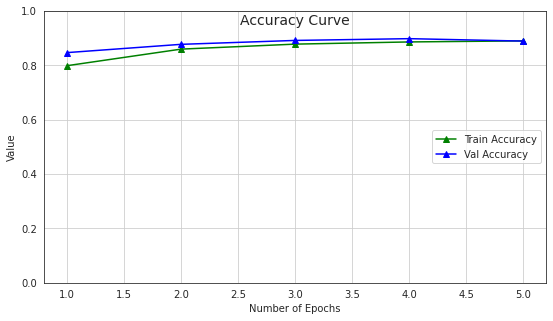

In [80]:
accuracy_curves(trained_model1)

Training Loss: 0.14796532690525055
Validation Loss: 0.16448481380939484


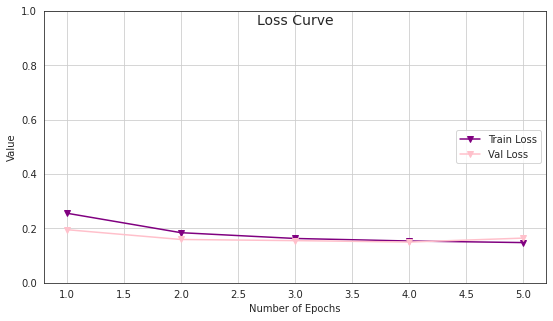

In [81]:
loss_curves(trained_model1)

In [82]:
n_epochs = 10 # Updating the n_epochs

In [83]:
# call model_cnn to compile the model
model = model1()
    
# fit the model
trained_model1 = model.fit(X_train, y_train,
              batch_size = batch_size,
              epochs = n_epochs,
              validation_data=(X_valid, y_valid))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1522/1522 [==============================] - 42s 27ms/step - loss: 0.2452 - accuracy: 0.8098 - val_loss: 0.1938 - val_accuracy: 0.8429
Epoch 2/10
1522/1522 [==============================] - 45s 30ms/step - loss: 0.1794 - accuracy: 0.8644 - val_loss: 0.1584 - val_accuracy: 0.8893
Epoch 3/10
1522/1522 [==============================] - 46s 30ms/step - loss: 0.1611 - accuracy: 0.8791 - val_loss: 0.1540 - val_accuracy: 0.8933
Epoch 4/10
1522/1522 [==============================] - 41s 27ms/step - loss: 0.1527 - accuracy: 0.8873 - val_loss: 0.1757 - val_accuracy: 0.8749
Epoch 5/10
1522/1522 [==============================] - 45s 29ms/step - loss: 0.1464 - accuracy: 0.8929 - val_loss: 0.1508 - val_accuracy: 0.8976
Epoch 6/10
1522/1522 [==============================] - 45s 30ms/step - loss: 0.1431 - accuracy: 0.8953 - val_loss: 0.1420 - val_accuracy: 0.9023
Epoch 7/10
1522/1522 [==============================] - 45s 30ms/step - loss: 0.1406 - accuracy: 0.8960 - val_loss: 0.1537 - val_accura

In [85]:
model_validation(model)

653/653 [==============================] - 8s 12ms/step - loss: 0.1374 - accuracy: 0.9068
Validation loss: 0.1373986303806305
Validation accuracy: 0.9068129658699036


Training Accuracy: 0.8989301919937134
Validation Accuracy: 0.9068129658699036


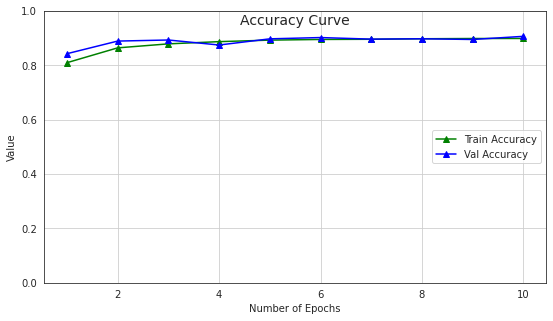

In [86]:
accuracy_curves(trained_model1)

Training Loss: 0.13653141260147095
Validation Loss: 0.1373986303806305


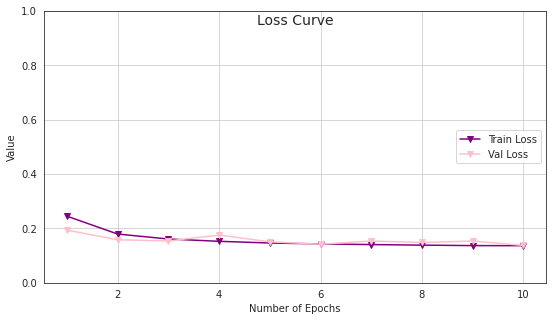

In [87]:
loss_curves(trained_model1)

In [88]:
filters = 200 # Reducing number of filters and neurons in Convolutional and Fully Connected Layers respectively.
kernel_size = 3
hidden_dims = 200
batch_size = 32
n_epochs = 10 # Updating the n_epochs
actfn = 'relu'
optimizer_ = tf.optimizers.SGD
drop_rate = 0.2 # Dropping the drop rate
learningrate = 0.02

In [89]:
def model2():
    
    model = Sequential()
    
    # Embedding layer
    model.add(Embedding(max_features, embedding_dim, trainable = False
                       ,embeddings_initializer = tf.keras.initializers.Constant(embed_matrix)))    
    # First dropout
    model.add(Dropout(drop_rate))
    
    # First convolutional layer (200 Filters, Kernel size 3 * 3, Padding actually not required)
    model.add(Conv1D(filters, 3, padding = 'valid', activation = 'relu')) 
    
    # Max pooling layer
    model.add(MaxPooling1D())
    
    # Second convolutional layer (200 Filters, Kernel size 5 * 5, Padding actually not required)
    model.add(Conv1D(filters, 5, padding = 'valid', activation = 'relu')) 
    
    # Max pooling layer
    model.add(MaxPooling1D())

    # Third convolutional layer (200 Filters, Kernel size 7 * 7, )
    model.add(Conv1D(filters, 7, padding = 'valid', activation = 'relu'))
    
    # Global max pooling layer
    model.add(GlobalMaxPooling1D())
    
    # Fully Connected Layer with 200 neurons (processing output from the 200 kernels in 2nd convolutional layer)
    model.add(Dense(hidden_dims,activation = 'relu'))
    
    # Second dropout
    model.add(Dropout(drop_rate))
    
    # final dense layer (Final 7 classifying outcomes, sigmoid activation function to provide probability of sample being of a particular class)
    model.add(Dense(7, activation = 'sigmoid'))
    
    # Binary Cross Entropy since the output of each class is binary value
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer_(lr = 0.02), metrics = ['accuracy']) 

    return model

In [90]:
# call model_cnn to compile the model
model = model2()
    
# fit the model
trained_model2 = model.fit(X_train, y_train,
              batch_size = batch_size,
              epochs = n_epochs,
              validation_data=(X_valid, y_valid))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1522/1522 [==============================] - 49s 32ms/step - loss: 0.2682 - accuracy: 0.7876 - val_loss: 0.2102 - val_accuracy: 0.8244
Epoch 2/10
1522/1522 [==============================] - 47s 31ms/step - loss: 0.1977 - accuracy: 0.8451 - val_loss: 0.1872 - val_accuracy: 0.8496
Epoch 3/10
1522/1522 [==============================] - 47s 31ms/step - loss: 0.1775 - accuracy: 0.8639 - val_loss: 0.1646 - val_accuracy: 0.8763
Epoch 4/10
1522/1522 [==============================] - 47s 31ms/step - loss: 0.1674 - accuracy: 0.8729 - val_loss: 0.1620 - val_accuracy: 0.8777
Epoch 5/10
1522/1522 [==============================] - 50s 33ms/step - loss: 0.1617 - accuracy: 0.8765 - val_loss: 0.1551 - val_accuracy: 0.8839
Epoch 6/10
1522/1522 [==============================] - 47s 31ms/step - loss: 0.1578 - accuracy: 0.8808 - val_loss: 0.1692 - val_accuracy: 0.8678
Epoch 7/10
1522/1522 [==============================] - 51s 33ms/step - loss: 0.1547 - accuracy: 0.8835 - val_loss: 0.1522 - val_accura

In [91]:
model_validation(model)

653/653 [==============================] - 7s 11ms/step - loss: 0.1469 - accuracy: 0.8895
Validation loss: 0.14693564176559448
Validation accuracy: 0.889517068862915


Training Accuracy: 0.8897308111190796
Validation Accuracy: 0.889517068862915


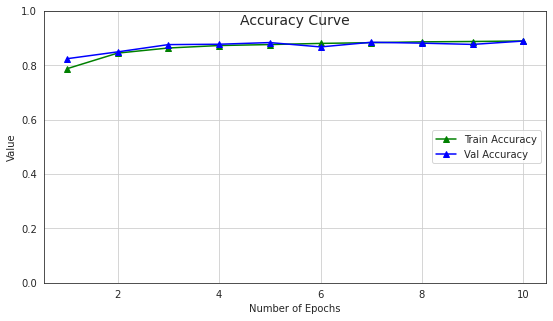

In [92]:
accuracy_curves(trained_model2)

Training Loss: 0.1489182859659195
Validation Loss: 0.14693564176559448


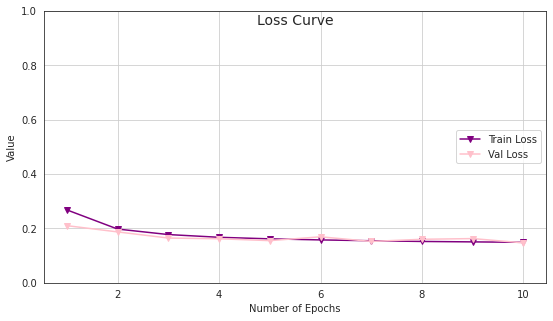

In [93]:
loss_curves(trained_model2)

In [94]:
filters = 100 # Reducing number of filters and neurons in Convolutional and Fully Connected Layers respectively.
kernel_size = 3
hidden_dims = 100
batch_size = 32
n_epochs = 10 # Updating the n_epochs
actfn = 'relu'
optimizer_ = tf.optimizers.SGD
drop_rate = 0.2 # Dropping the drop rate
learningrate = 0.02

In [95]:
def model3():
    
    model = Sequential()
    
    # Embedding layer
    model.add(Embedding(max_features, embedding_dim, trainable = False
                       ,embeddings_initializer = tf.keras.initializers.Constant(embed_matrix)))    
    # First dropout
    model.add(Dropout(drop_rate))
    
    # First convolutional layer (100 Filters, Kernel size 3 * 3, Padding actually not required)
    model.add(Conv1D(filters, 3, padding = 'valid', activation = 'relu')) 
    
    # Max pooling layer
    model.add(MaxPooling1D())
    
    # Second convolutional layer (100 Filters, Kernel size 3 * 3, Padding actually not required)
    model.add(Conv1D(filters, 3, padding = 'valid', activation = 'relu')) 
    
    # Max pooling layer
    model.add(MaxPooling1D())

     # Second convolutional layer (100 Filters, Kernel size 5 * 5, Padding actually not required)
    model.add(Conv1D(filters, 5, padding = 'valid', activation = 'relu')) 
    
    # Max pooling layer
    model.add(MaxPooling1D())

    # Third convolutional layer (100 Filters, Kernel size 7 * 7)
    model.add(Conv1D(filters, 7, padding = 'valid', activation = 'relu'))
    
    # Global max pooling layer
    model.add(GlobalMaxPooling1D())
    
    # Fully Connected Layer with 100 neurons (processing output from the 250 kernels in 2nd convolutional layer)
    model.add(Dense(hidden_dims,activation = 'relu'))
    
    # Second dropout
    model.add(Dropout(drop_rate))
    
    # final dense layer (Final 7 classifying outcomes, sigmoid activation function to provide probability of sample being of a particular class)
    model.add(Dense(7, activation = 'sigmoid'))
    
    # Binary Cross Entropy since the output of each class is binary value
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer_(lr = 0.02), metrics = ['accuracy'])  

    return model

In [96]:
# call model_cnn to compile the model
model = model3()
    
# fit the model
trained_model3 = model.fit(X_train, y_train,
              batch_size = batch_size,
              epochs = n_epochs,
              validation_data=(X_valid, y_valid))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1522/1522 [==============================] - 30s 18ms/step - loss: 0.3014 - accuracy: 0.7660 - val_loss: 0.2542 - val_accuracy: 0.7670
Epoch 2/10
1522/1522 [==============================] - 26s 17ms/step - loss: 0.2356 - accuracy: 0.7988 - val_loss: 0.2172 - val_accuracy: 0.8141
Epoch 3/10
1522/1522 [==============================] - 27s 17ms/step - loss: 0.2122 - accuracy: 0.8272 - val_loss: 0.2052 - val_accuracy: 0.8294
Epoch 4/10
1522/1522 [==============================] - 26s 17ms/step - loss: 0.1997 - accuracy: 0.8415 - val_loss: 0.1910 - val_accuracy: 0.8465
Epoch 5/10
1522/1522 [==============================] - 28s 18ms/step - loss: 0.1926 - accuracy: 0.8474 - val_loss: 0.1889 - val_accuracy: 0.8485
Epoch 6/10
1522/1522 [==============================] - 26s 17ms/step - loss: 0.1874 - accuracy: 0.8500 - val_loss: 0.1867 - val_accuracy: 0.8496
Epoch 7/10
1522/1522 [==============================] - 26s 17ms/step - loss: 0.1855 - accuracy: 0.8523 - val_loss: 0.1904 - val_accura

In [104]:
model_validation(model)

Validation set
loss: 0.17720536887645721
accuracy: 0.8600996732711792


Training Accuracy: 0.8580463528633118
Validation Accuracy: 0.8587102293968201


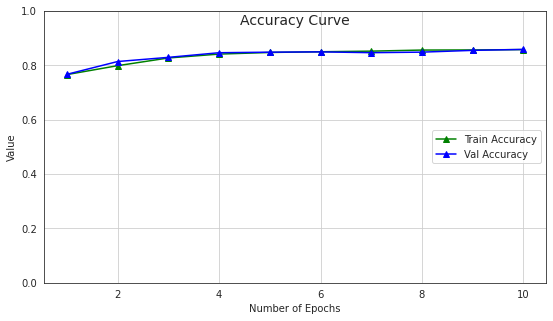

In [140]:
accuracy_curves(trained_model3)

Training Loss: 0.1793222874403
Validation Loss: 0.17840494215488434


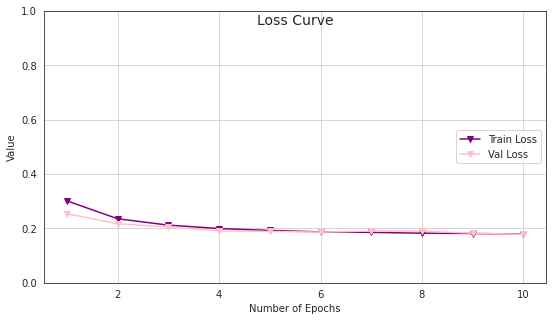

In [141]:
loss_curves(trained_model3)

In [129]:
y_test[y_test<0] = 0

In [130]:
#Testing Loss, Accuracy
model.evaluate(X_test_final, y_test, verbose = 1)

2000/2000 [==============================] - 20s 10ms/step - loss: 0.1506 - accuracy: 0.8744


[0.15061378479003906, 0.8743630647659302]

In [131]:
# predict test values
y_pred = model.predict(X_test_final, verbose = 1, batch_size = 32)

2000/2000 [==============================] - 11s 5ms/step


In [100]:
y_pred[0:3]

array([[4.8502870e-02, 1.4451775e-03, 1.7949073e-02, 4.9931608e-04,
        1.5606890e-02, 2.2970801e-03, 9.4728529e-01],
       [2.8965163e-01, 3.2052983e-02, 1.6736844e-01, 1.4505365e-02,
        1.5253882e-01, 3.6762238e-02, 6.9295508e-01],
       [5.5408716e-01, 1.0630538e-02, 2.2412913e-01, 9.0589924e-03,
        2.0084865e-01, 2.1679996e-02, 3.5124826e-01]], dtype=float32)

In [101]:
find = np.where(y_test[:, :6] == 1)
print(find)

(array([    8,    24,    24, ..., 63976, 63976, 63976]), array([0, 0, 2, ..., 0, 2, 4]))


In [110]:
i = 0
for i in range(7):
    print(y_test[24][i], ":", y_pred[24][i])

1 : 0.8491843
0 : 0.09757908
1 : 0.5732493
0 : 0.037182797
1 : 0.5187221
1 : 0.08377286
0 : 0.12627529


In [108]:
print(test["comment_text"][21])
i = 0
for i in range(7):
    print(y_test[24][i], ":", y_pred[21][i])

 arabs are committing genocide in iraq but no protests in europe may europe also burn in hell
1 : 0.036068298
0 : 0.00095362356
1 : 0.013589838
0 : 0.0002594205
1 : 0.010997554
1 : 0.0015826782
0 : 0.960015
